In [ ]:
"""
https://elitedatascience.com/python-seaborn-tutorial
&
https://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/
blob/master/notebooks/libraries/Seaborn.ipynb
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('Pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


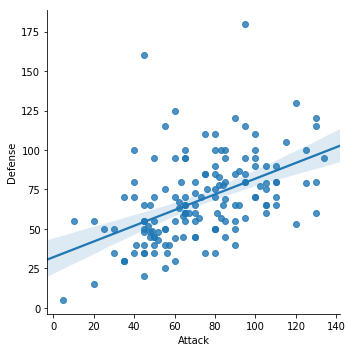

In [5]:
# Plot a comparison of the attack and defense stats
sns.lmplot(x='Attack', y='Defense', data=df)

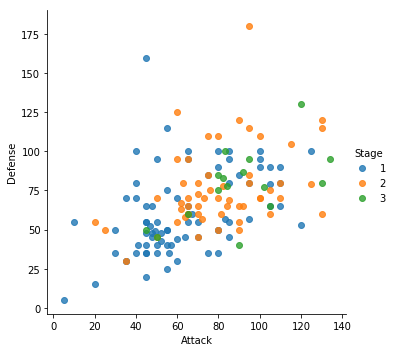

In [7]:
# tweaking the above plot
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False, # removes the regression line
          hue='Stage') # colored by evolution stage

(0, 141.9881096001028)

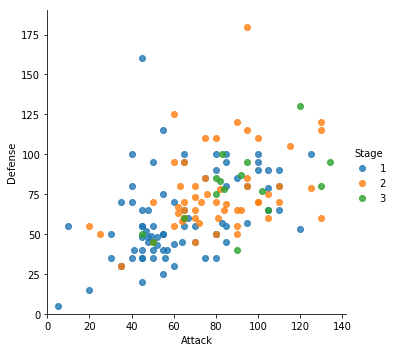

In [8]:
# customizing a little more using Matplotlib
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False, hue='Stage')

# sets the axes limits starting at 0
plt.ylim(0, None)
plt.xlim(0, None)

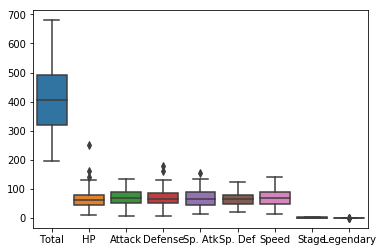

In [9]:
# making a boxplot
sns.boxplot(data=df)

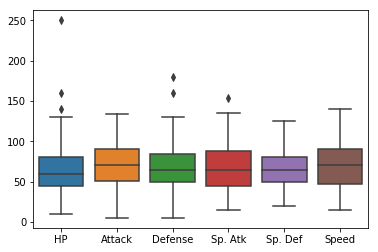

In [10]:
# remove Total, Stage, and Lengendary columns because they aren't needed here
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

sns.boxplot(data=stats_df)

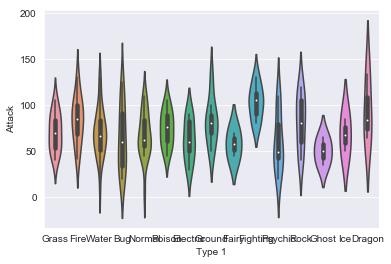

In [14]:
# set the theme of Seaborn plots to dark
# make a violin plot
sns.set_style('darkgrid')

sns.violinplot(x='Type 1', y='Attack', data=df)

In [12]:
# fix the colors to match the Pokemon types
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

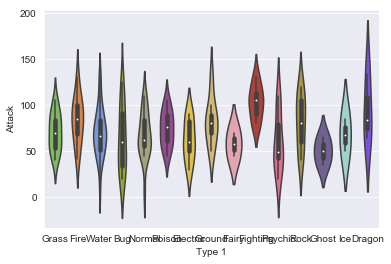

In [15]:
# re-plot the violin plot with the corrected colors
sns.violinplot(x='Type 1', y='Attack', data=df,
               palette=pkmn_type_colors)

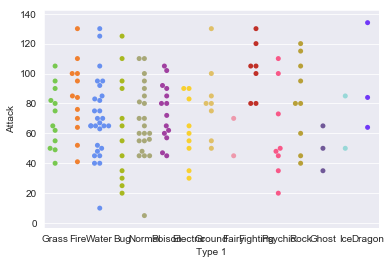

In [16]:
# make a swarm plot to visualize each point, while stacking those with 
# similar values
sns.swarmplot(x='Type 1', y='Attack', data=df,
             palette=pkmn_type_colors)

In [ ]:
"""
Overlaying plots:
1. Make our figure larger
2. Plot the violin plot (set inner=None to remove the bars inside)
3. Plot the swarm plot
4. Set a title using Matplotlib
"""

Text(0.5, 1.0, 'Attack by Type')

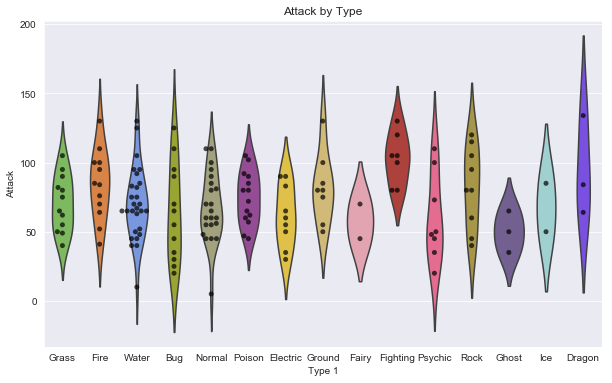

In [17]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Type 1', y='Attack', data=df, inner=None,
              palette=pkmn_type_colors)

sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', #black
             alpha=0.7)

plt.title('Attack by Type')

In [19]:
stats_df.head() # current format of our data

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [18]:
# Do some data wrangling to combine all the stats into one column
# Use the Pandas melt() function
melted_df = pd.melt(stats_df, id_vars=['Name', 'Type 1', 'Type 2'],
                   var_name='Stat') # name of the melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [20]:
# compare the shape of the two DataFrames
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


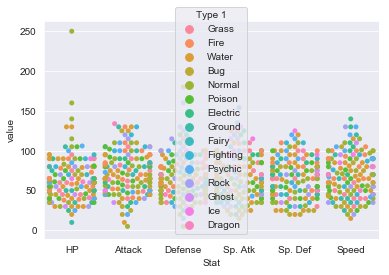

In [21]:
# Make a swarm plot with melted_df
sns.swarmplot(x='Stat', #separate swarms by stat
             y='value', data=melted_df, hue='Type 1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


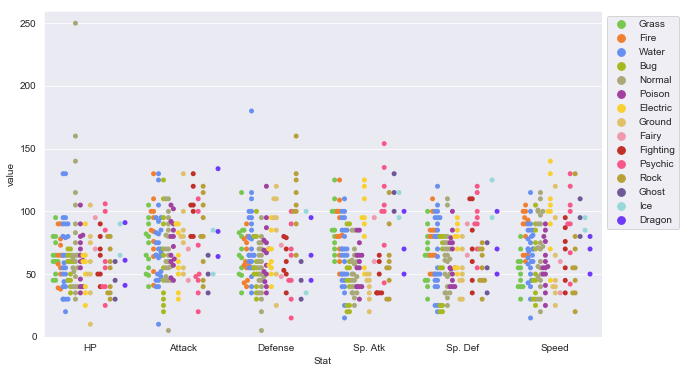

In [22]:
"""
Tweak the above plot to be more readable
1. Enlarge
2. Separate points by hue using split=True
3. Use the custom palette
4. Adjust the y-axis limited to end at 0
5. Place the legend to the right
"""
plt.figure(figsize=(10, 6))

sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1',
             split=True, palette=pkmn_type_colors)

plt.ylim(0, 260)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

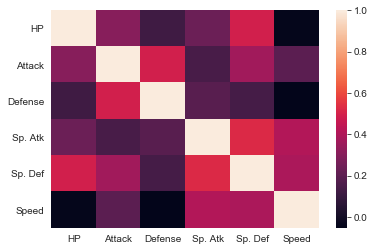

In [23]:
# Miscellaneous plots possible with Seaborn
# Heatmap

corr = stats_df.corr() # calculate correlations

sns.heatmap(corr)

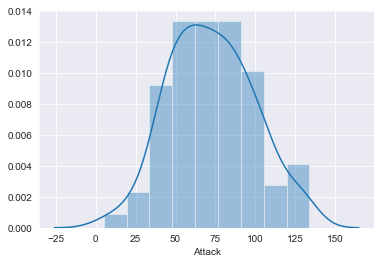

In [24]:
# Histogram

sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

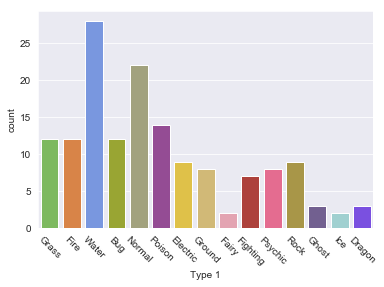

In [26]:
# Bar plot

sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

plt.xticks(rotation= -45) # rotate x-labels to fit better beneath plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


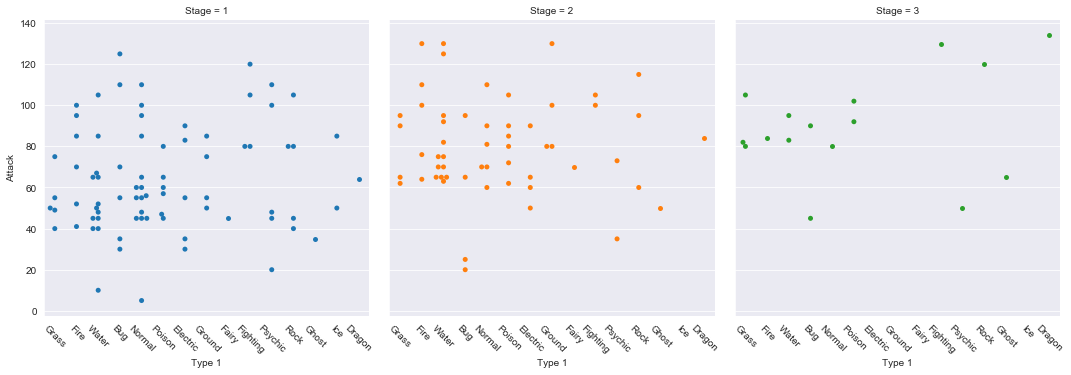

In [28]:
# Factor plot
g = sns.factorplot(x='Type 1', y='Attack', data=df, hue='Stage',
                  col='Stage', #separate by stage
                  kind='swarm') #swarmplot

g.set_xticklabels(rotation= -45) # use this instead of the function above
                                # because that one will only rotate the 
                                # last plot instead of all of them

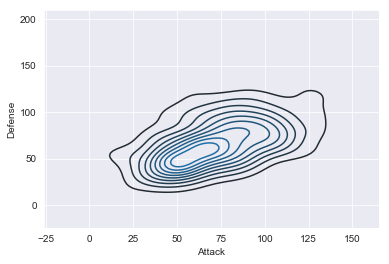

In [29]:
# Density plot

sns.kdeplot(df.Attack, df.Defense)

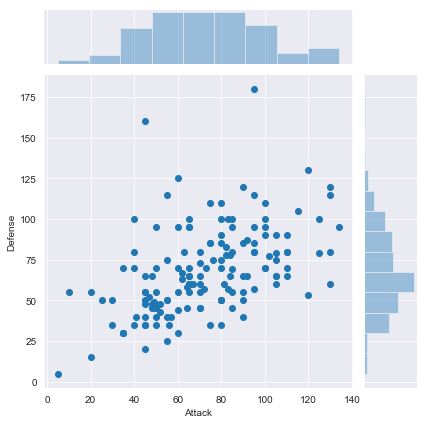

In [30]:
# Joint Distribution plot

sns.jointplot(x='Attack', y='Defense', data=df)